# Importing required libraries

In [ ]:
import os #stdio.h
import numpy as np # linear algebra math.h
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
cd /content/DA_ES

Archive:  /content/drive/MyDrive/Năm 2 kì 2/Mochi Es/archive.zip
replace dirty_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace missing_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace warehouses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Reading csv file

In [ ]:
dirty_data = pd.read_csv('dirty_data.csv')

# Overview file

In [ ]:
# display top 5 rows
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


# Displaying statistical info of dirty_data

In [ ]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [ ]:
print(f'Shape of dirty_data is: {dirty_data.shape}')

Shape of dirty_data is: (500, 16)


# Whether any columns contains null value or not

In [ ]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [ ]:
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


**So no column contain null value**

# Analyzing datatype of each column

In [ ]:
print(dirty_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


### **Data type of date column is object instead of datetime, So fixing this problem**

In [ ]:
dirty_data.date = pd.to_datetime(dirty_data['date'], format = 'mixed')

In [ ]:
print(dirty_data.dtypes)  # Now data in date column is in datetime64 form

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


# Analyzing order_id

### **Checking whether order_id is unique or not**

In [ ]:
if dirty_data.order_id.is_unique:
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")  # execute when 'else' block will true

Data in order_id is unique


# Analyzing nearest_warehouse

### **Unique item in nearest_warehouse**

In [ ]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

### **Thompson and thompson are same but here they both are different so make it same**

### **Similarly Nickolson and nickolson are same**

# To solve this problem, convert data in nearest_warehouse in title case

In [ ]:
#Method 1:
dirty_data.nearest_warehouse = dirty_data.nearest_warehouse.str.title()

In [ ]:
#Method 2
for i in range(len(dirty_data)):
  if(dirty_data['nearest_warehouse'][i] == 'nickolson'):
    dirty_data['nearest_warehouse'][i] = 'Nickolson'
  if(dirty_data['nearest_warehouse'][i] == 'thompson'):
    dirty_data['nearest_warehouse'][i] = 'Thompson'

In [ ]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

**Now this problem is solved**

# Checking quantities of near_warehouse

In [ ]:
warehouses = dirty_data['nearest_warehouse'].value_counts()
print(warehouses)

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64


# Visualizing data using bar chart

In [ ]:
x_data = ['Warehouse A', 'Warehouse B', 'Warehouse C']
y_data = warehouses  # Replace with your actual counts

# Creating a bar trace for Plotly
bar_trace = go.Bar(
    x=x_data,
    y=y_data,
    marker=dict(color=['red', 'green', 'blue'])  # Replace with your colors
)

# Layout for Plotly plot
layout = go.Layout(
    title="Quantity of the warehouses",
    yaxis=dict(title="Counts")
)

# Creating Plotly figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Displaying the Plotly figure
fig.show()

# Visualizing data using pie chart

In [ ]:
import plotly.graph_objs as go

warehouse_counts = warehouses  
labels = ['Thomson', 'Nickolson', 'Bakers']

# Creating a pie trace for Plotly
pie_trace = go.Pie(
    labels=labels,
    values=warehouse_counts,
    hoverinfo='label+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['red', 'green', 'blue']), 
    hole=0.3,
    pull=[0, 0.01, 0.1],
    rotation=60
)

# Layout for Plotly plot
layout = go.Layout(
    title="Quantity of warehouses",
    titlefont=dict(size=15)
)

# Creating Plotly figure
fig = go.Figure(data=[pie_trace], layout=layout)

# Displaying the Plotly figure
fig.show()

### **It seems that Thomson is nearest warehouse accessible to mostly customer**

### **Analyzing order_price and order_total**
- order_price: Price before any discounts and delivery charges
- order_total: Price after all discounts and/or delivery charges are applied

# <p Displaying Record whose order price is maximum

In [ ]:
dirty_data[dirty_data.order_price == dirty_data.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


# Displaying Record whose order price is minimum

In [ ]:
dirty_data[dirty_data.order_price == dirty_data.order_price.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


In [ ]:
for column in ['date','order_price','delivery_charges','coupon_discount','order_total']:
    print(f"{column}\n\tMin: {dirty_data[column].min()}\n\tMax: {dirty_data[column].max()}")

date
	Min: 2019-01-02 00:00:00
	Max: 2019-12-31 00:00:00
order_price
	Min: 585
	Max: 947691
delivery_charges
	Min: 46.35
	Max: 114.04
coupon_discount
	Min: 0
	Max: 25
order_total
	Min: 639.29
	Max: 5688269.6


## **Now checking whether the order_total(after all discount and delivery charges are applied) is correct or there is some problem in it**

In [ ]:
#dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)
#loc -> extract record
#[:] -> all records
#[:,['coupon_discount']] -> all record, column coupon_discount
#head(10) -> first 10 records
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


# Computing and Displaying order_total price of first 10 records

In [ ]:
#in range -> loop from 0 to 10
#dirty_data['coupon_discount'] -> extract all record in columns 'coupon_discount'
#dirty_data['coupon_discount'][i] -> extract record in column 'coupon_discoun' in index 'i'
for i in range(0,10):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * (1 - (dirty_data['coupon_discount'][i] / 100))   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(price,2)

    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place

    print(f'Order total of record at index {i} is: {final_price} ')

Order total of record at index 0 is: 11059.89 
Order total of record at index 1 is: 9142.71 
Order total of record at index 2 is: 9668.87 
Order total of record at index 3 is: 21137.61 
Order total of record at index 4 is: 6934.29 
Order total of record at index 5 is: 7100.22 
Order total of record at index 6 is: 13089.84 
Order total of record at index 7 is: 7614.28 
Order total of record at index 8 is: 22958.58 
Order total of record at index 9 is: 11384.26 


### **It looks like that there is an error in order_total feature of dirty_data, So fixing this**

In [ ]:
lis = list()     # creating an empty list

# Computing and appending order_final in 'lis'

In [ ]:
#len(dirty_data) -> number of record in dirty_data
#lis.append -> append new record
for i in range(0,len(dirty_data)):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * ( 1 - (dirty_data['coupon_discount'][i] / 100))   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges

        final_price = np.round(price,2)
        lis.append(final_price)               # appending final_price to lis

    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        lis.append(final_price)                  # appending final_price to lis


In [ ]:
print(f'Items (Price) in list is: {len(lis)}')

Items (Price) in list is: 500


# Converting list to Series and set it in order_total

In [ ]:
dirty_data['order_total'] = pd.Series(lis)

# show


In [ ]:
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,7614.28
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


**Now the problem with order_total is solved**

# Removing outlier

### - **Using IQR**

# Checking for Outlier in order_total

In [ ]:
Q1_order_total = dirty_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = dirty_data['order_total'].quantile(0.75)     # Upper Quartile

In [ ]:
print(f'Lower Quartile is: {Q1_order_total}')
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 6454.735
Upper Quartile is: 18119.1875


# Finding IQR

In [ ]:
# upper quartile - lower quartile

IQR_order_total = Q3_order_total - Q1_order_total

In [ ]:
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 11664.4525


# Finding lower and upper limit

In [ ]:
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total

In [ ]:
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -11041.943749999999
Upper limit of order_total is: 35615.86625


### **Any value less then lower limit and greater then upper limit is outlier**

# Displaying all outlier values

In [ ]:
outlier_dirty_data = dirty_data[(dirty_data['order_total'] < lower_limit_order_total) | (dirty_data['order_total'] > upper_limit_order_total)]

In [ ]:
outlier_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
12,ORD124395,ID0702352304,2019-02-11,Thompson,"[('Alcon 10', 1), ('Universe Note', 1), ('pear...",19010,94.75,-37.805433,144.941333,0,926057.25,Summer,True,0.9509,the cult's alive i love this little dummy-phon...,True
31,ORD383725,ID2020813862,2019-03-01,Thompson,"[('Universe Note', 2), ('iAssist Line', 2), ('...",15820,64.81,-37.811524,144.959221,15,402307.25,Autumn,False,1.0763,"omg this is an amazing phone, this can be comp...",True
41,ORD481832,ID0589473307,2019-02-02,Nickolson,"[('Universe Note', 2), ('Candle Inferno', 2), ...",14070,73.33,-37.820067,144.958612,15,620502.30,Summer,False,0.9757,very pleased with the thunder 2nd generation. ...,True
55,ORD442452,ID0582560124,2019-08-26,Nickolson,"[('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...",43520,62.93,-37.822185,144.978657,5,41406.93,Winter,True,0.8949,was not described accurately phone was labeled...,False
61,ORD028755,ID0283255338,2019-06-13,Bakers,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
81,ORD016018,ID0579501050,2019-10-01,Thompson,"[('pearTV', 2), ('Toshika 750', 1), ('iAssist ...",19165,71.34,-37.814270,144.949384,25,393761.23,Spring,False,0.2703,"awesome phone as a droid fan, i love this phon...",True
204,ORD451441,ID4245791607,2019-11-24,Thompson,"[('iStream', 1), ('Toshika 750', 2)]",8790,85.53,-37.801220,144.963020,5,967408.88,Spring,False,1.8957,this phone is great. nice size this phone is g...,True
238,ORD450897,ID6212685642,2019-10-05,Bakers,"[('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...",17530,79.05,-37.816462,144.986026,0,648477.60,Spring,False,1.0833,... was a gift to my wife - she just love the ...,True
261,ORD244594,ID0361268957,2019-09-26,Bakers,"[('pearTV', 2), ('Universe Note', 2), ('Thunde...",22130,108.92,-37.798997,144.977882,25,649193.76,Spring,True,1.9565,love this tablet easy to use and extremely aff...,True
267,ORD139508,ID0207093574,2019-12-21,Bakers,"[('Toshika 750', 1), ('Candle Inferno', 1), ('...",16150,62.70,-37.803624,145.007949,5,969651.79,Summer,False,1.3244,"very disappointed battery life is poor, not ve...",False


## **Above records is outlier, So removing it from original data**

In [ ]:
print(f'Total outlier records in dirty_data is: {outlier_dirty_data.shape[0]}')

Total outlier records in dirty_data is: 18


### **Any data which is greater than lower limit and less than upper limit is Not an Outlier**

In [ ]:
data_without_outlier = dirty_data[(dirty_data['order_total'] > lower_limit_order_total) & (dirty_data['order_total'] < upper_limit_order_total)]

In [ ]:
print(f'Total numbers of records without outliers is: {data_without_outlier.shape[0]}')

Total numbers of records without outliers is: 482


# Displaying top 5 records of data without outliers

In [ ]:
data_without_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


# Analyzing how many customers are happy with sevice

In [ ]:
data_without_outlier['is_happy_customer'].unique()

array([ True, False])

In [ ]:
satisfaction = data_without_outlier['is_happy_customer'].value_counts()
print(satisfaction)

is_happy_customer
True     346
False    136
Name: count, dtype: int64


# Visualizing Data

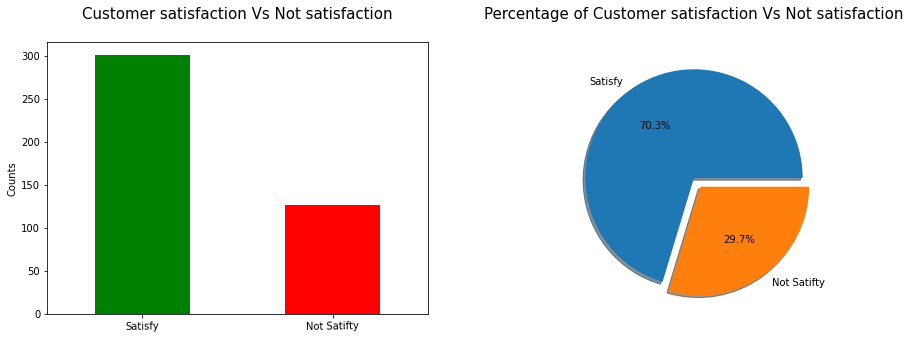

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


plt.subplot(122)
plt.pie(satisfaction, labels=['Satisfy','Not Satifty'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of Customer satisfaction Vs Not satisfaction\n", size=15)

plt.show()

In [ ]:
import plotly.graph_objs as go

x_data = ['True', 'False']
y_data = satisfaction # Replace with your actual counts

# Creating a bar trace for Plotly
bar_trace = go.Bar(
    x=x_data,
    y=y_data,
    marker=dict(color=['red', 'green', 'blue'])  # Replace with your colors
)

# Layout for Plotly plot
layout = go.Layout(
    title="percentage",
    yaxis=dict(title="Counts")
)

# Creating Plotly figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Displaying the Plotly figure
fig.show()

In [ ]:
import plotly.graph_objs as go

# Pie chart data
warehouse_counts = satisfaction  # Replace with your actual counts
labels = ['True', 'False']

# Creating a pie trace for Plotly
pie_trace = go.Pie(
    labels=labels,
    values=warehouse_counts,
    hoverinfo='label+percent',
    textinfo='percent',
    textfont=dict(size=20),
    marker=dict(colors=['red', 'green']),  # Replace with your colors
    hole=0.3,
    pull=[0, 0.01],
    rotation=60
)

# Creating Plotly figure
fig = go.Figure(data=[pie_trace])

# Layout for Plotly plot
layout = go.Layout(
    title="Percentage",
    titlefont=dict(size=15),
    yaxis=dict(title="Counts")
)

# Updating layout
fig.update_layout(layout)

# Displaying the Plotly figure
fig.show()

## **70.3% customers are satisfy with service**